#Préprocessamento dos dados

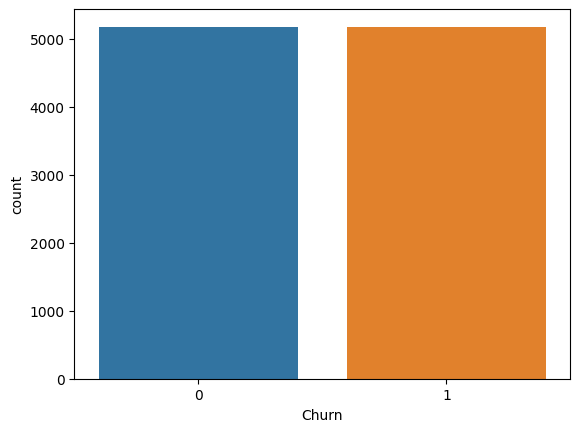

In [13]:
import pandas as pd

#recupera conjunto de dados
dados = pd.read_csv('https://github.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/raw/main/Dados/Customer-Churn.csv')

#modificação de forma manual 
traducao_dic = {'Sim': 1, 
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)

#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

#junção dos dados trasformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)


#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

#dividindo os dados em caracteristicas e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

#geração de novos dados com a técnica Smote de Oversampling
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

#junção dos dados balanceados
dados_final = pd.concat([X, y], axis=1)

#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dados_final)

#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)

#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

#Classificação utilizando KNN

In [14]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos  
knn = KNeighborsClassifier(metric='euclidean')

#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

#Naive Bayes Bernoulli

In [24]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB
import numpy as np

#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados

#criamos o modelo usando a mediana
bnb = BernoulliNB(binarize=abs(np.median(X_treino)))

#treinar o modelo
bnb.fit(X_treino, y_treino)

#testar o modelo
predito_BNb = bnb.predict(X_teste)

#Árvore de decisão

In [22]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

#instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

#treinar o modelo
dtc.fit(X_treino, y_treino)

predito_ArvoreDecisao = dtc.predict(X_teste)

#Análise Comparativa dos Modelos

In [25]:
from sklearn.metrics import confusion_matrix

print('Matriz de confusão KNN', confusion_matrix(y_teste, predito_knn))
print('Matriz de confusão Naive Bayes', confusion_matrix(y_teste, predito_BNb))
print('Matriz de confusão Random Forest', confusion_matrix(y_teste, predito_ArvoreDecisao))

from sklearn.metrics import accuracy_score

print('Acurácia KNN', accuracy_score(y_teste, predito_knn))
print('Acurácia Naive Bayes', accuracy_score(y_teste, predito_BNb))
print('Acurácia Random Forest', accuracy_score(y_teste, predito_ArvoreDecisao))

from sklearn.metrics import precision_score

print('Precisão KNN', precision_score(y_teste, predito_knn))
print('Precisão Naive Bayes', precision_score(y_teste, predito_BNb))
print('Precisão Random Forest', precision_score(y_teste, predito_ArvoreDecisao))

from sklearn.metrics import recall_score

print('Recall KNN', recall_score(y_teste, predito_knn))
print('Recall Naive Bayes', recall_score(y_teste, predito_BNb))
print('Recall Random Forest', recall_score(y_teste, predito_ArvoreDecisao))

Matriz de confusão KNN [[1242  327]
 [ 248 1288]]
Matriz de confusão Naive Bayes [[1084  485]
 [ 238 1298]]
Matriz de confusão Random Forest [[1250  319]
 [ 275 1261]]
Acurácia KNN 0.8148148148148148
Acurácia Naive Bayes 0.7671497584541063
Acurácia Random Forest 0.808695652173913
Precisão KNN 0.7975232198142415
Precisão Naive Bayes 0.727986539540101
Precisão Random Forest 0.7981012658227848
Recall KNN 0.8385416666666666
Recall Naive Bayes 0.8450520833333334
Recall Random Forest 0.8209635416666666
